# ABCDEats Inc.
## Data Mining - 2024/2025 - Group 22
Bruna Duarte m20210669

### Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os, sys
#hide the warnings

sys.stderr = open(os.devnull, "w")  # silence stderr
from sklearn.ensemble import RandomForestRegressor
sys.stderr = sys.__stderr__  # unsilence stderr


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import ceil
import numpy as np
import pandas as pd
import csv
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV
from sklearn.feature_selection import RFE, mutual_info_classif, mutual_info_regression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, mutual_info_score
from kmodes.kprototypes import KPrototypes
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
import hypertools as hyp
from plotnine import *
from sklearn.metrics import pairwise_distances


import umap
import umap.plot
import umap
from sklearn.datasets import fetch_openml
from sklearn.utils import resample


%matplotlib inline
# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set(rc={'figure.figsize':(11.7,8.27)})


ModuleNotFoundError: No module named 'sompy'

## Import Dataset

In [3]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


During our Exploratory Data Analysis (EDA), we must also account for:
* Coherence check
* Outliers
* Missing values
* Feature Engineering

Depending on the context, various steps must be considered when performing Data Preprocessing.
The most relevant steps are the following:
* Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
* Data editing (fix inconsistent values)
* Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
* Data wrangling (feature extraction/engineering and transformation)
* Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

## Data Exploration

In [4]:
df.set_index('customer_id',inplace=True)
df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,...,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Some columns like customer_age, first_order, and HR_0 contain missing values.

### Options for handling:
* For **customer_age**, imputation can be based on the mean or median age of customers.
* For **first_order**, imputing missing values with the median.
* For **HR_0** (missing hours), it could be treated similarly.

In [7]:
# Impute missing values for customer_age and first_order
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['first_order'].fillna(df['first_order'].median(), inplace=True)

# Fill missing HR_0 with 0
df['HR_0'].fillna(0, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31888 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31888 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

### Descriptive statistics
* Numerical Columns, can be studied using descriptive stats:

In [9]:
df[['customer_age', 'vendor_count', 'product_count', 'first_order', 'last_order']].describe()


,customer_age,vendor_count,product_count,first_order,last_order
count,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.472153,3.102609,5.668245,28.457068,63.675521
std,7.082367,2.771587,6.957287,24.071869,23.226123
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,7.000000,49.000000
50%,26.000000,2.000000,3.000000,22.000000,70.000000
75%,31.000000,4.000000,7.000000,45.000000,83.000000
max,80.000000,41.000000,269.000000,90.000000,90.000000


* Categorical columns, can be analyzed using frequency counts:

In [12]:
df['customer_region'].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [13]:
df['last_promo'].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [14]:
df['payment_method'].value_counts()

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64

* Cuisine-related columns, can be analyzed by calculating total spending per cuisine to determine preferences:

<Axes: title={'center': 'Total Spending by Cuisine'}>

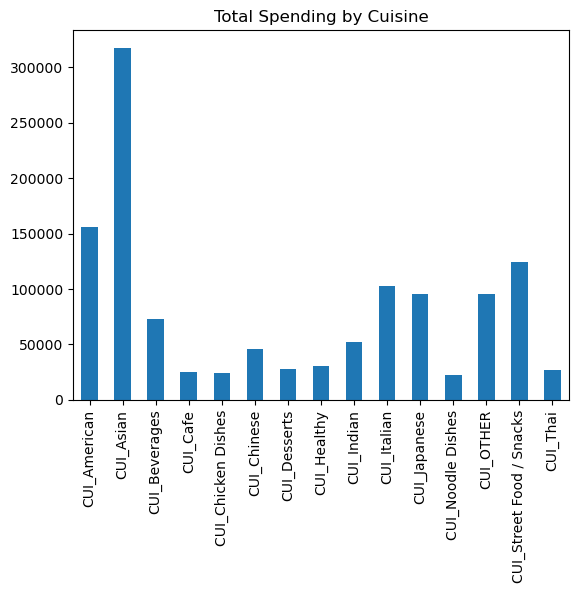

In [15]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df[cuisine_columns].sum().plot(kind='bar', title='Total Spending by Cuisine')

### Visualize Data Distribution

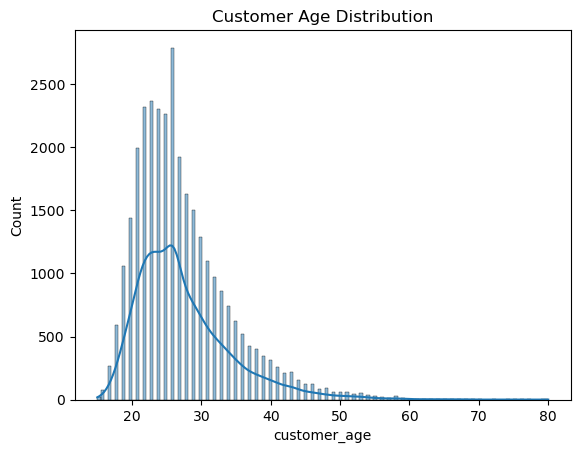

In [16]:
sns.histplot(df['customer_age'], kde=True)
plt.title('Customer Age Distribution')
plt.show()


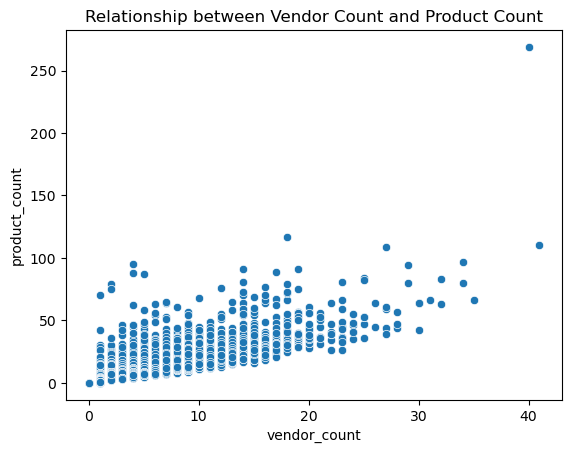

In [17]:
sns.scatterplot(x='vendor_count', y='product_count', data=df)
plt.title('Relationship between Vendor Count and Product Count')
plt.show()

### Exploring Day / Hour Order Patterns
* Day of The Week (number of orders per day of the week):

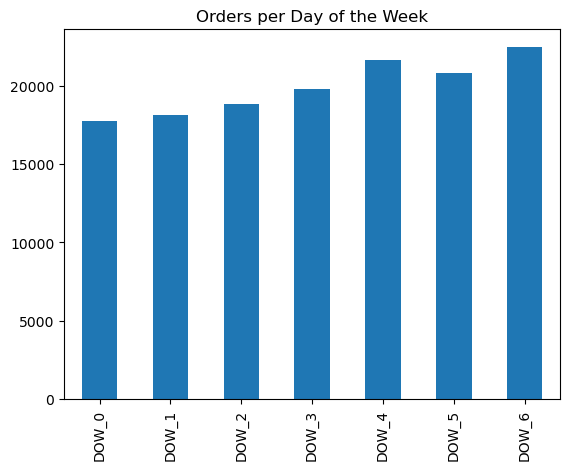

In [18]:
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
df[dow_columns].sum().plot(kind='bar', title='Orders per Day of the Week')
plt.show()

* Hour of The Day Analysis:

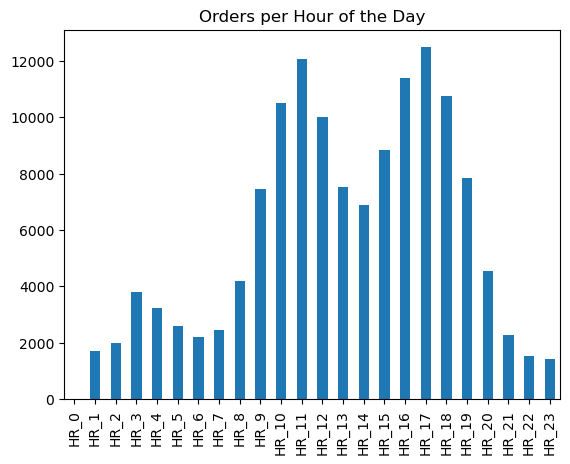

In [19]:
hr_columns = [f'HR_{i}' for i in range(24)]
df[hr_columns].sum().plot(kind='bar', title='Orders per Hour of the Day')
plt.show()


### Correlation Analysis
* Exploring relationship between numerical features:

In [26]:
# Replace any placeholders like '-' with NaN
df.replace('-', np.nan, inplace=True)

In [30]:
numeric_df = df.select_dtypes(include=[np.number])

In [31]:
numeric_df.fillna(numeric_df.median(), inplace=True)

In [32]:
# plot the heatmap
def corr_heatmap(corr):
    sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("coolwarm", 50), 
                fmt = '0.1f', mask = np.triu(corr))
    plt.title("Correlation Plot", fontsize = 20, fontweight = 'bold')
    plt.show()

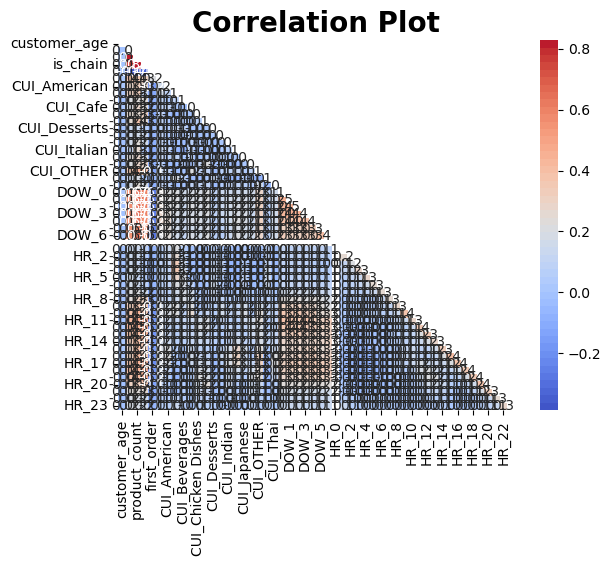

In [33]:
df_corr = numeric_df.corr()
corr_heatmap(df_corr)